<a href="https://colab.research.google.com/github/zinakhazaee/Visualization/blob/main/Grocery_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets_sample/Grosery/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [3]:
df.shape

(9994, 11)

In [4]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [5]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [33]:
category = df.groupby(by ='Category').size()
category

Category
Bakery               1413
Beverages            1400
Eggs, Meat & Fish    1490
Food Grains          1398
Fruits & Veggies     1418
Oil & Masala         1361
Snacks               1514
dtype: int64

<Axes: xlabel='Category', ylabel='count'>

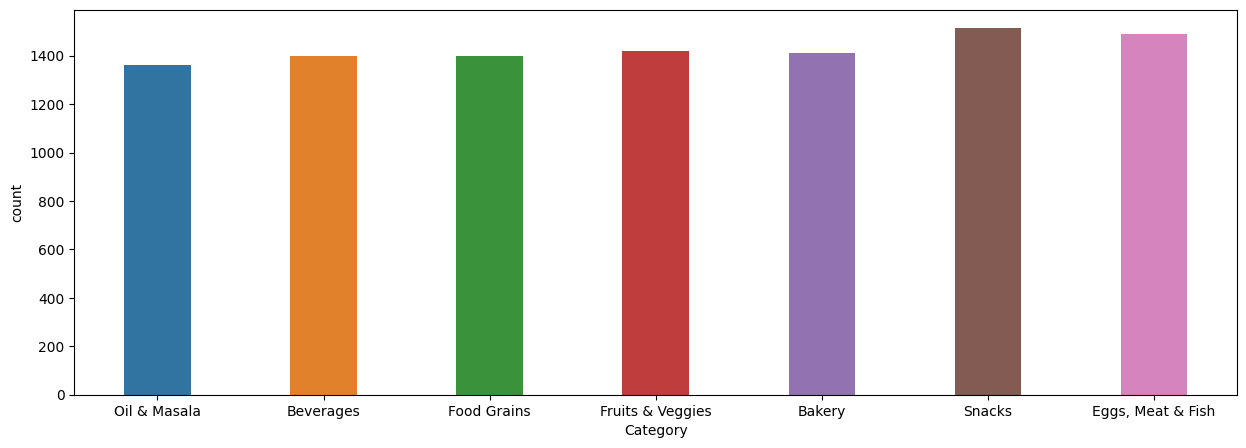

In [66]:
ax = plt.subplots(figsize=(15, 5))
sns.countplot(df , x = 'Category', width= .4 )

In [25]:
sub_category =df.groupby(by ='Sub Category').size()
sub_category

Sub Category
Atta & Flour          353
Biscuits              459
Breads & Buns         502
Cakes                 452
Chicken               348
Chocolates            499
Cookies               520
Dals & Pulses         343
Edible Oil & Ghee     451
Eggs                  379
Fish                  369
Fresh Fruits          369
Fresh Vegetables      354
Health Drinks         719
Masalas               463
Mutton                394
Noodles               495
Organic Fruits        348
Organic Staples       372
Organic Vegetables    347
Rice                  330
Soft Drinks           681
Spices                447
dtype: int64

<Axes: xlabel='Sub Category', ylabel='count'>

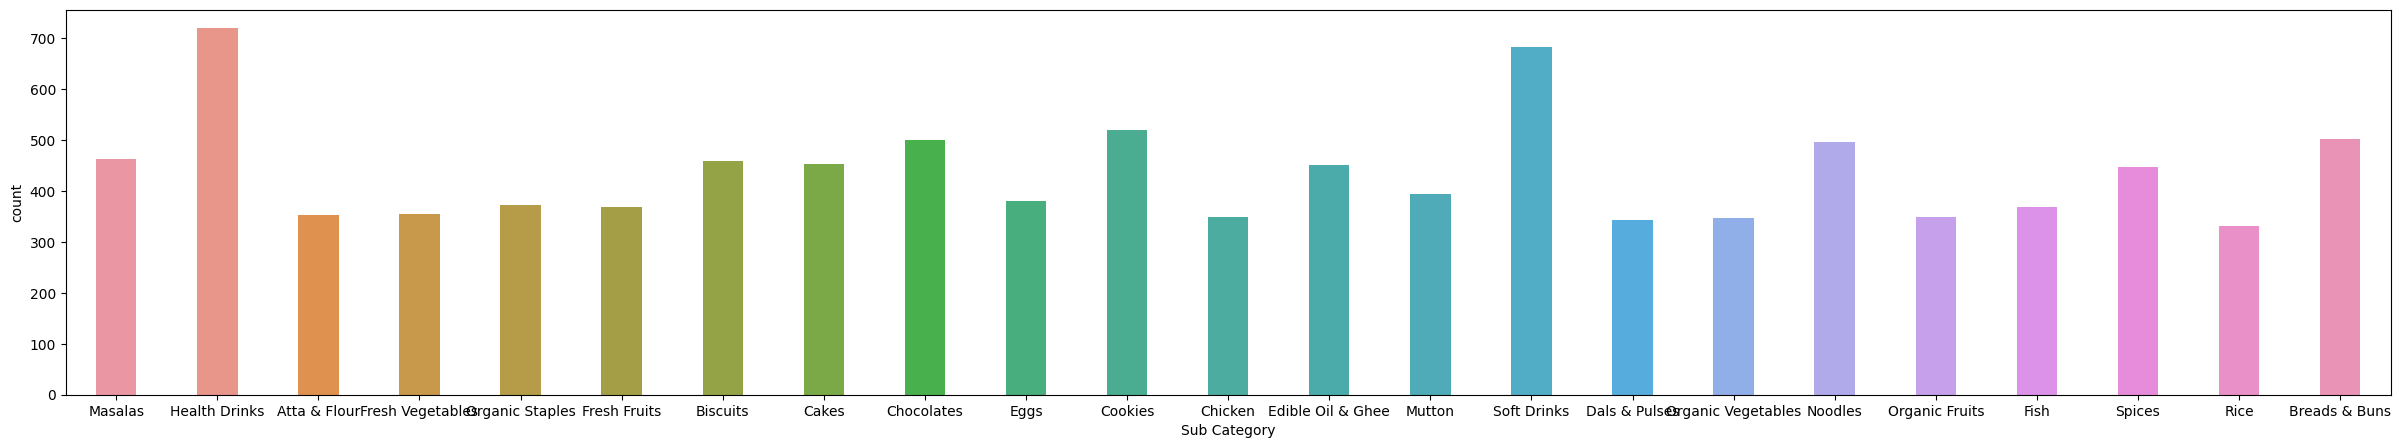

In [52]:
ax = plt.subplots(figsize=(30, 5))
sns.countplot(df , x = 'Sub Category' , width= .4 )

In [57]:
df.groupby(by ='City').size()

City
Bodi              442
Chennai           432
Coimbatore        428
Cumbum            417
Dharmapuri        376
Dindigul          396
Kanyakumari       459
Karur             430
Krishnagiri       440
Madurai           408
Nagercoil         373
Namakkal          403
Ooty              404
Perambalur        434
Pudukottai        430
Ramanadhapuram    421
Salem             431
Tenkasi           432
Theni             387
Tirunelveli       446
Trichy            357
Vellore           435
Viluppuram        397
Virudhunagar      416
dtype: int64

<Axes: xlabel='City', ylabel='count'>

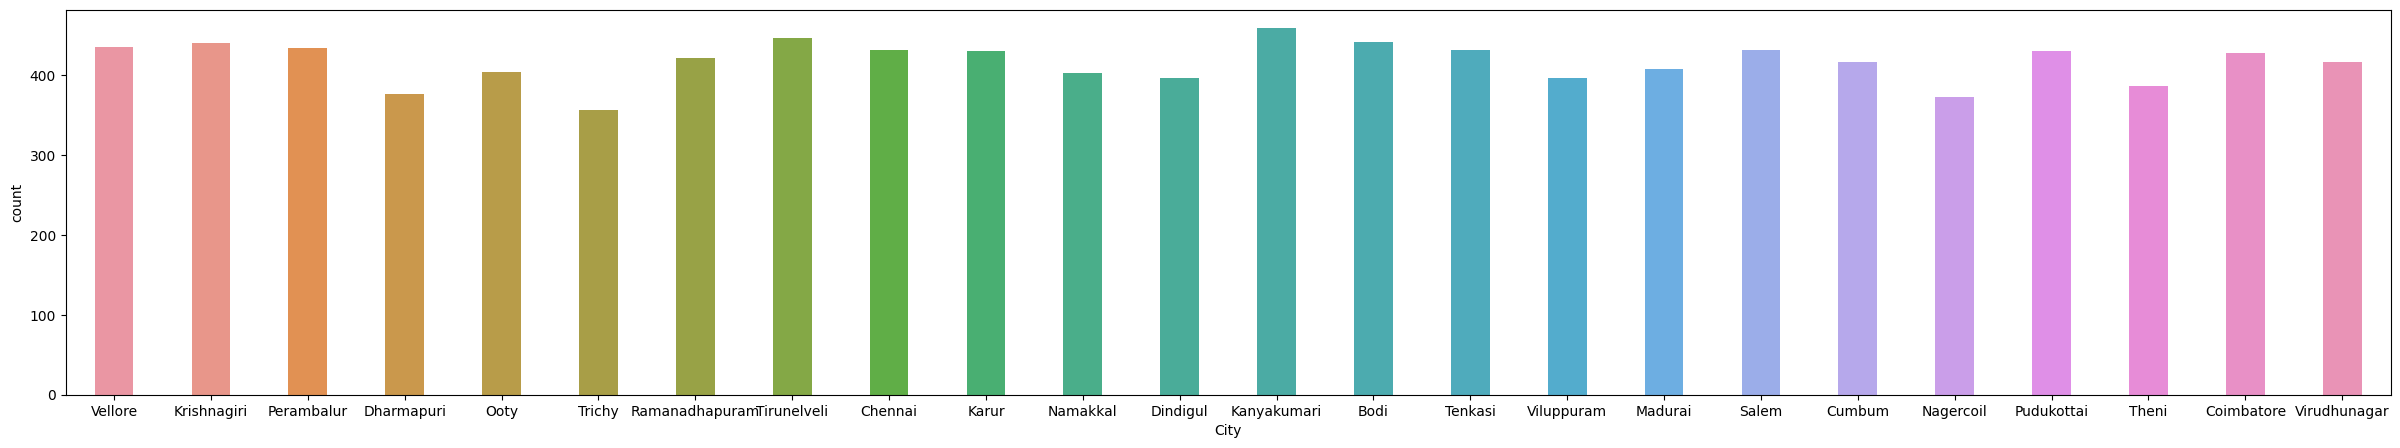

In [59]:
ax = plt.subplots(figsize=(30, 5))
sns.countplot(df , x = 'City' , width= .4 )

In [61]:
df.groupby(by ='Region').size()

Region
Central    2323
East       2848
North         1
South      1619
West       3203
dtype: int64

<Axes: xlabel='Region', ylabel='count'>

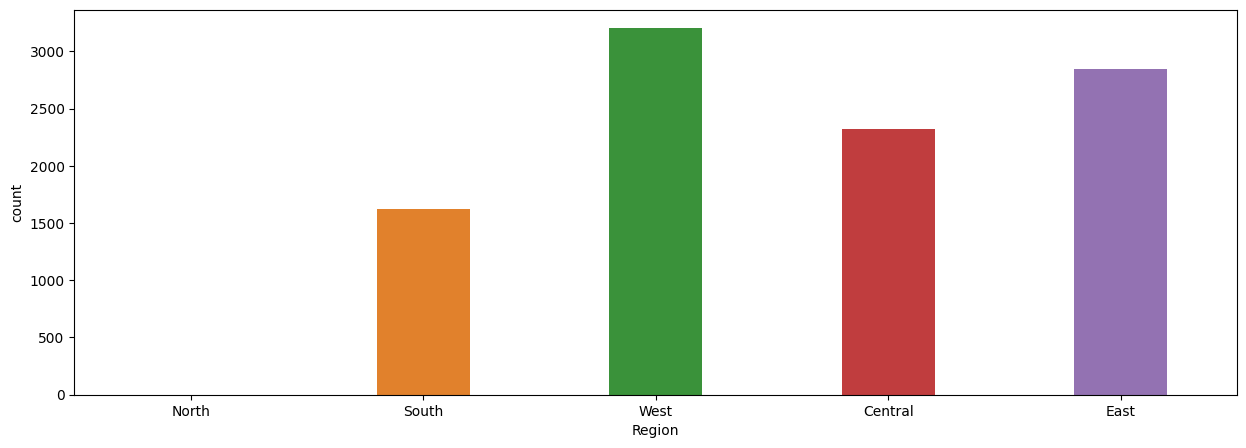

In [63]:
ax = plt.subplots(figsize=(15, 5))
sns.countplot(df , x = 'Region' , width= .4 )

<Axes: xlabel='Category', ylabel='Sales'>

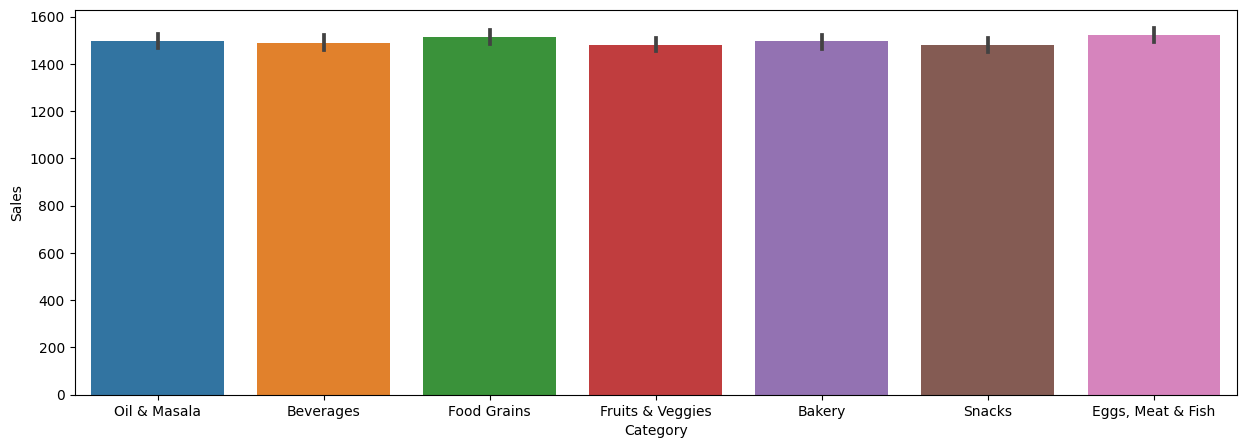

In [68]:
ax = plt.subplots(figsize=(15, 5))
sns.barplot(df , x= 'Category' , y= 'Sales' )

<Axes: xlabel='Sub Category', ylabel='Sales'>

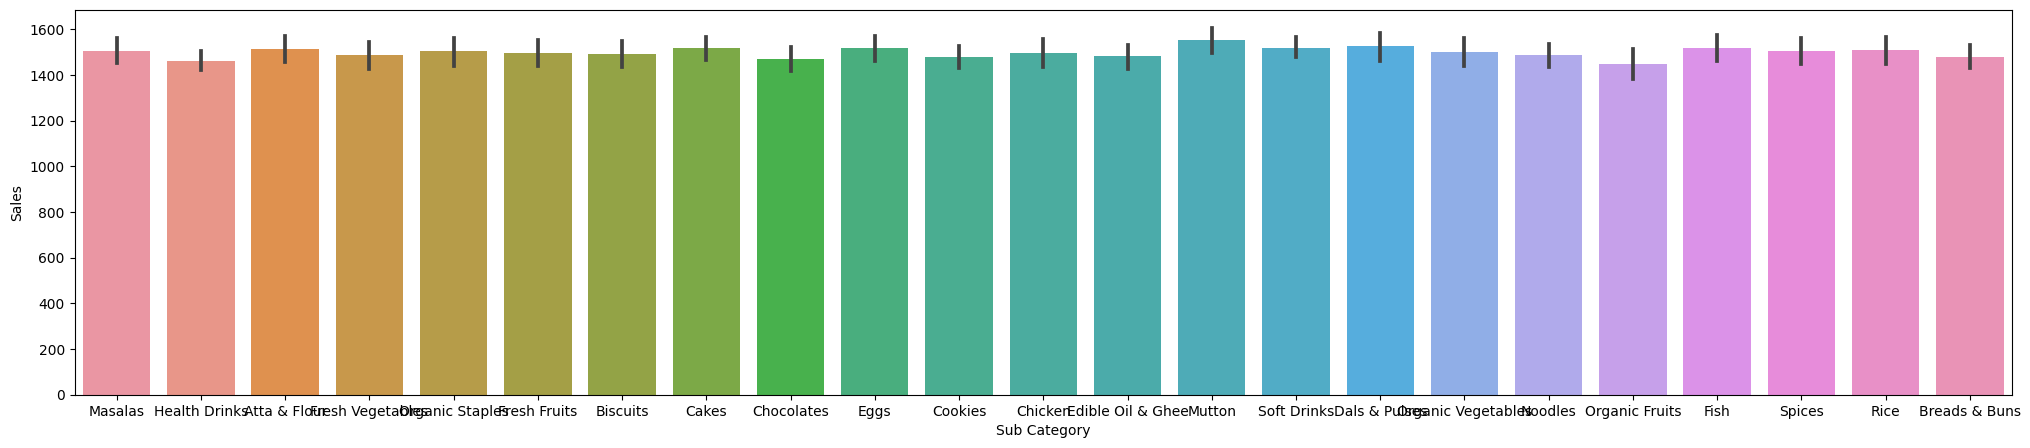

In [70]:
ax = plt.subplots(figsize=(25, 5))
sns.barplot(df , x= 'Sub Category' , y= 'Sales' )